In [31]:
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.base import clone

In [33]:
# Function to generate target function values
def generating_func(x):
    return np.sin(x)

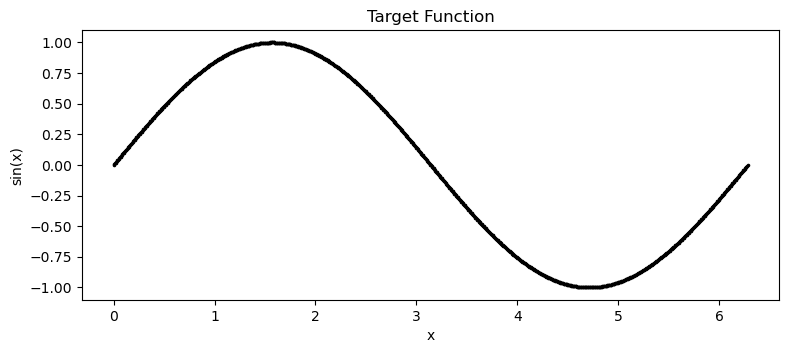

In [35]:

# Number of samples
n_samples = 1000
np.random.seed(0)

# Generate input values
x = np.linspace(0, 2 * math.pi, n_samples)
y = generating_func(x)

# Draw the target function
plt.figure(figsize=(9, 3.5))
plt.scatter(x, y, marker='.', c='k', s=10)
plt.xlabel("x")
plt.ylabel("sin(x)")
plt.title("Target Function")
plt.show()

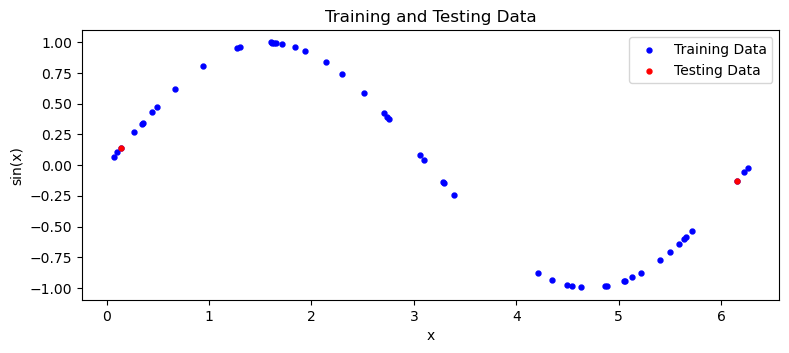

In [37]:
# Training vs. Testing data with different sizes
np.random.seed(math.ceil(10 * np.random.rand()))
n_training_samples = 50
idx = np.random.permutation(n_samples)

# Select training and testing data
training_data = x[idx[:n_training_samples]]
training_targets = generating_func(training_data)
testing_data = x[idx[:2]]
testing_targets = generating_func(testing_data)

# Plot training and testing data
plt.figure(figsize=(9, 3.5))
plt.scatter(training_data, training_targets, marker='.', c='b', s=50, label="Training Data")
plt.scatter(testing_data, testing_targets, marker='.', c='r', s=50, label="Testing Data")
plt.legend()
plt.xlabel("x")
plt.ylabel("sin(x)")
plt.title("Training and Testing Data")
plt.show()

In [43]:
# Model Complexity and Hypothesis Averaging
degrees = [1, 2, 3, 4, 5, 6, 20]  # Polynomial degrees
n_training_samples = 4
np.random.seed(100)
idx = np.random.permutation(n_samples)
testing_data = x[idx[:10]]
testing_targets = generating_func(testing_data)

# Initialize model
est = make_pipeline(PolynomialFeatures(degrees[0]), LinearRegression())
Ml_list = []
no_hypotheses = 100
MSE_training = np.zeros(no_hypotheses)
MSE_test = np.zeros(no_hypotheses)
x_plot = np.linspace(-1, 1, 200)  # Points for plotting smooth curves

predictions = np.zeros((no_hypotheses, len(x_plot)))  # Store predictions for each hypothesis

# Train multiple models to compute bias-variance tradeoff
for i in range(no_hypotheses):
    Ml_list.append(clone(est))
    np.random.seed(i)
    idx = np.random.permutation(n_samples)
    training_data = x[idx[:n_training_samples]]
    training_targets = generating_func(training_data)
    
    # Train model
    Ml_list[i].fit(training_data[:, np.newaxis], training_targets)
    predicted_training = Ml_list[i].predict(training_data.reshape(-1, 1))
    MSE_training[i] = np.sum(np.abs(training_targets - predicted_training))
    predicted_testing = Ml_list[i].predict(testing_data.reshape(-1, 1))
    MSE_test[i] = np.sum(np.abs(testing_targets - predicted_testing))
    # Store predictions for plotting
    predictions[i] = Ml_list[i].predict(x_plot[:, np.newaxis])

# Compute average and variance of predictions
avg_prediction = np.mean(predictions, axis=0)
std_prediction = np.std(predictions, axis=0)



# Print error metrics
print('E_in (Training Error):', np.mean(MSE_training))
print('E_out (Testing Error):', np.mean(MSE_test))

E_in (Training Error): 0.91696272504955
E_out (Testing Error): 4.641252183999373


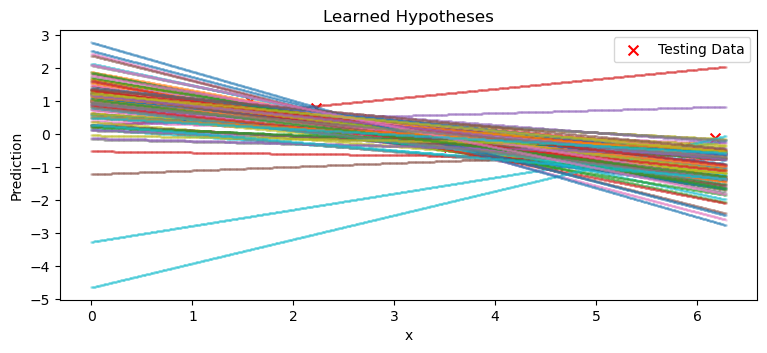

In [47]:
# Plot learned hypotheses
plt.figure(figsize=(9, 3.5))
plt.scatter(testing_data, testing_targets, marker='x', c='r', s=50, label="Testing Data")
for j in range(no_hypotheses):
    plt.scatter(x, Ml_list[j].predict(x[:, np.newaxis]), marker='.', s=5, alpha=0.2)
plt.xlabel("x")
plt.ylabel("Prediction")
plt.title("Learned Hypotheses")
plt.legend()
plt.show()

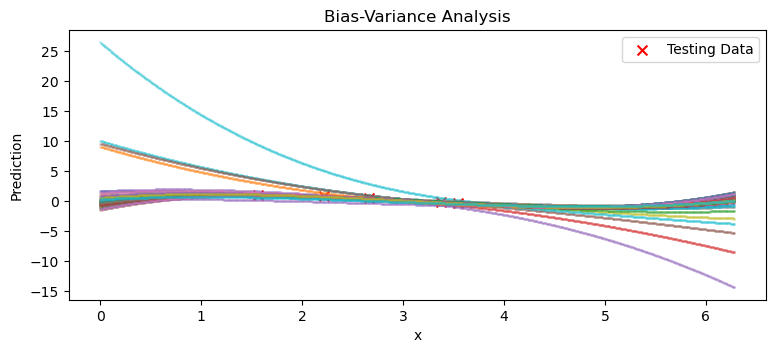

In [13]:
# **Bias and Variance Analysis**
degrees = [1, 2, 3, 4, 5, 6]
n_training_samples = 5
np.random.seed(100)
idx = np.random.permutation(n_samples)
testing_data = x[idx[:n_training_samples]]
testing_targets = generating_func(testing_data)

# Train multiple models for bias-variance analysis
est = make_pipeline(PolynomialFeatures(degrees[2]), LinearRegression())
Ml_list = []
no_hypotheses = 100

for i in range(no_hypotheses):
    Ml_list.append(clone(est))
    np.random.seed(i)
    idx = np.random.permutation(n_samples)
    training_data = x[idx[:n_training_samples]]
    training_targets = generating_func(training_data)
    Ml_list[i].fit(training_data[:, np.newaxis], training_targets)

# Plot different learned hypotheses
plt.figure(figsize=(9, 3.5))
plt.scatter(testing_data, testing_targets, marker='x', c='r', s=50, label="Testing Data")
for j in range(no_hypotheses):
    plt.scatter(x, Ml_list[j].predict(x[:, np.newaxis]), marker='.', s=5, alpha=0.2)
plt.xlabel("x")
plt.ylabel("Prediction")
plt.title("Bias-Variance Analysis")
plt.legend()
plt.show()

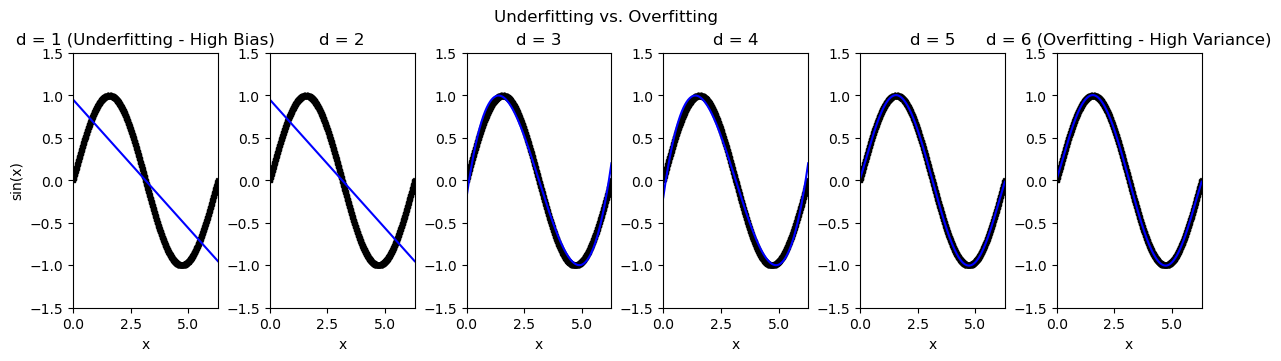

In [15]:
# **Underfitting vs. Overfitting Visualization**
titles = [
    'd = 1 (Underfitting - High Bias)',
    'd = 2', 'd = 3', 'd = 4', 'd = 5', 'd = 6 (Overfitting - High Variance)'
]
degrees = [1, 2, 3, 4, 5, 6]

fig, axes = plt.subplots(1, len(degrees), figsize=(12, 3.5), constrained_layout=True)

for i, d in enumerate(degrees):
    ax = axes[i]
    ax.scatter(x, y, marker='x', c='k', s=10)

    model = make_pipeline(PolynomialFeatures(d), LinearRegression())
    model.fit(x[:, np.newaxis], y)
    ax.plot(x, model.predict(x[:, np.newaxis]), '-b')

    ax.set_xlim(0, 2 * math.pi)
    ax.set_ylim(-1.5, 1.5)
    ax.set_xlabel("x")
    ax.set_title(titles[i])

axes[0].set_ylabel("sin(x)")
plt.suptitle("Underfitting vs. Overfitting")
plt.show()